In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read csv file
df=pd.read_csv("C:\\Users\\Pavan\\Downloads\\datasets_1980_3398_oasis_longitudinal.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
#missing values
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
#fill the missing values
df['SES'].fillna(df.SES.median(),inplace=True)
df['MMSE'].fillna(df.MMSE.median(),inplace=True)

In [6]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

# Data Visualization

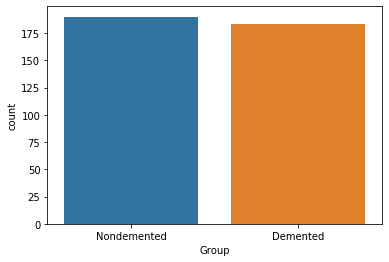

In [14]:
#convert Converted group into Demented
df['Group']=df['Group'].replace(['Converted'],['Demented'])
sns.countplot(x='Group',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186ACA2B9C8>,
      dtype=object)

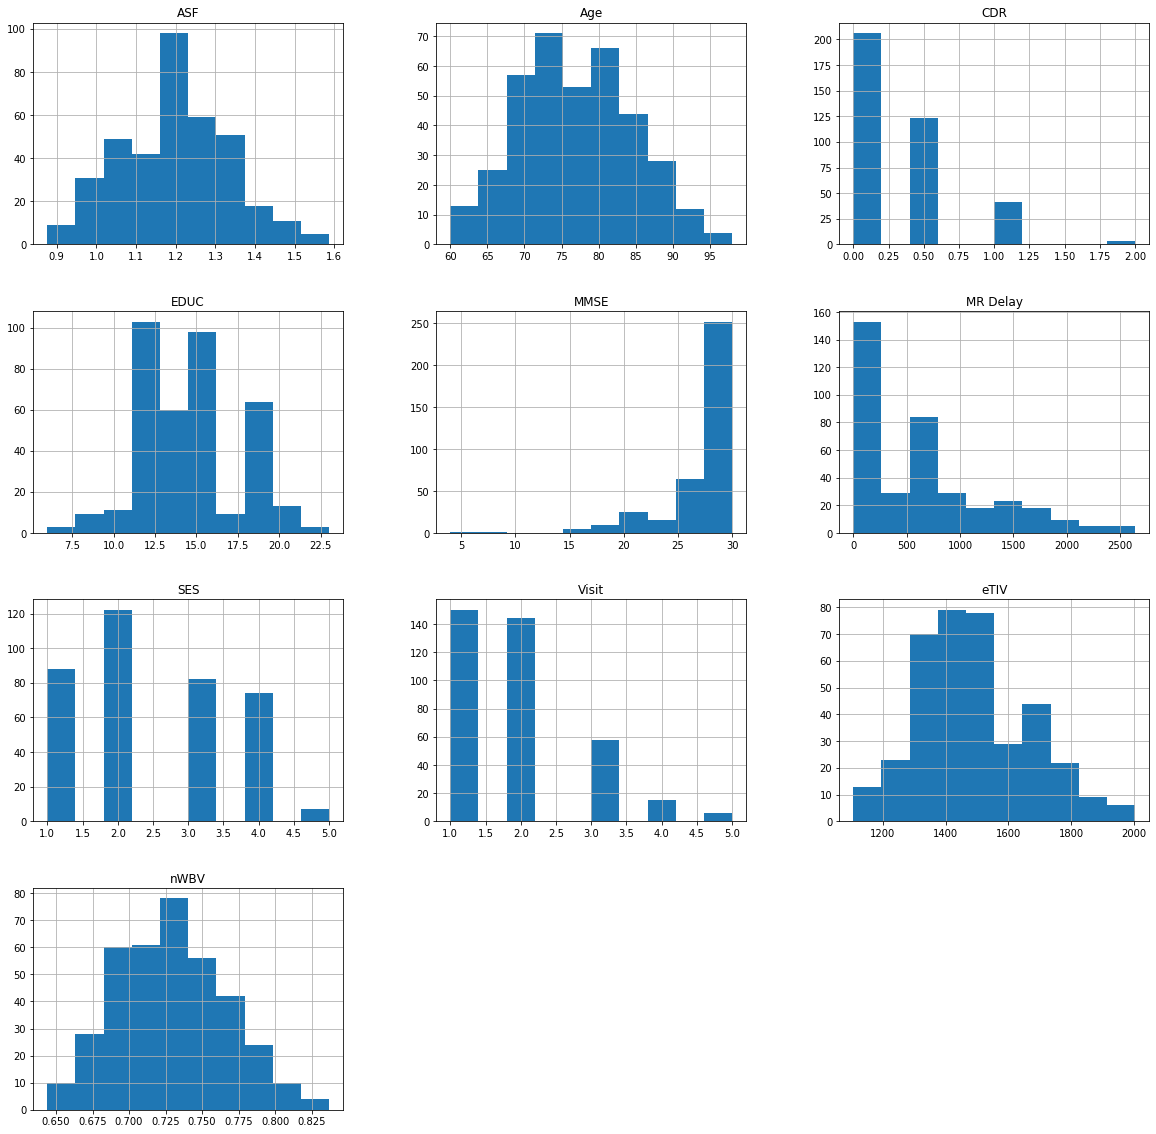

In [7]:
df.hist(figsize=(20,20))

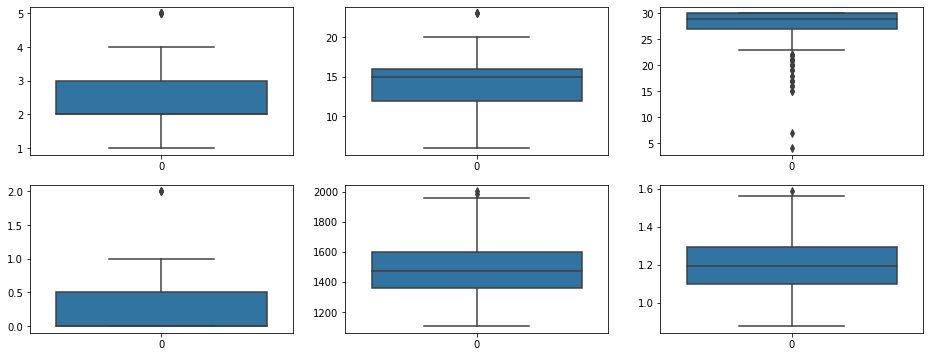

In [8]:
#boxplot 
fig,ax =plt.subplots(2,3,figsize=(16,6))
sns.boxplot(data=df['SES'],ax=ax[0][0])
sns.boxplot(data=df['EDUC'],ax=ax[0][1])
sns.boxplot(data=df['MMSE'],ax=ax[0][2])
sns.boxplot(data=df['CDR'],ax=ax[1][0])
sns.boxplot(data=df['eTIV'],ax=ax[1][1])
sns.boxplot(data=df['ASF'],ax=ax[1][2])

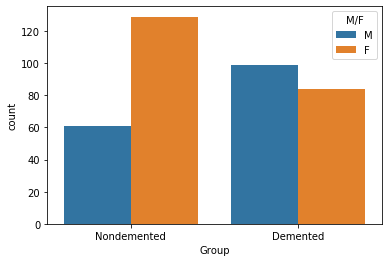

In [18]:
sns.countplot(x='Group',hue='M/F',data=df)

Men are more likely with dementia than women

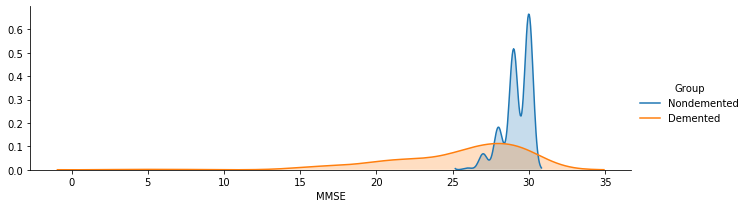

In [31]:
facet=sns.FacetGrid(data=df,hue="Group",aspect=3)
facet.map(sns.kdeplot,"MMSE",shade=True)
facet.add_legend()

Here,Nondemented group got higher MMSE than Demented

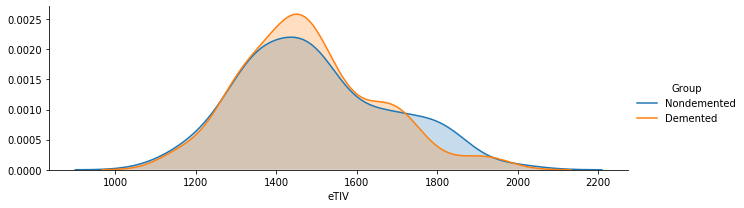

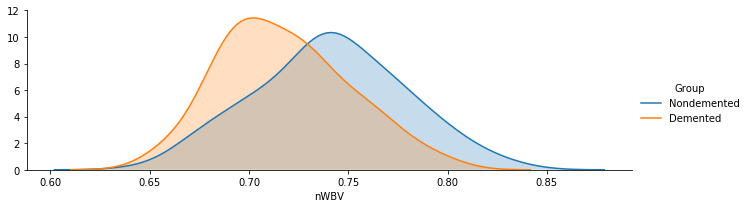

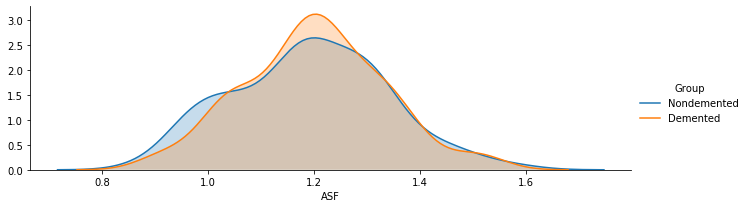

In [32]:
facet=sns.FacetGrid(data=df,hue="Group",aspect=3)
facet.map(sns.kdeplot,"eTIV",shade=True)
facet.add_legend()

facet=sns.FacetGrid(data=df,hue="Group",aspect=3)
facet.map(sns.kdeplot,"nWBV",shade=True)
facet.add_legend()

facet=sns.FacetGrid(data=df,hue="Group",aspect=3)
facet.map(sns.kdeplot,"ASF",shade=True)
facet.add_legend()

Nondemented group has higher brain volume than Demented group

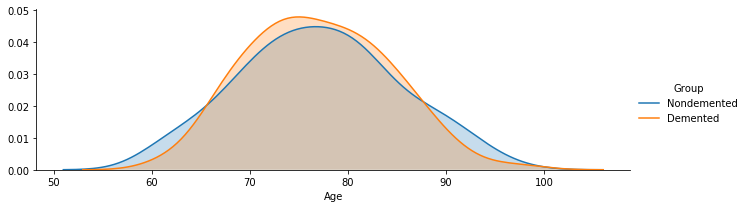

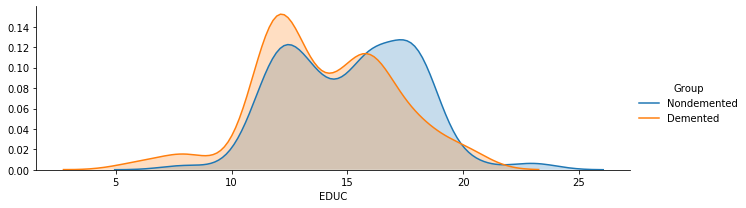

In [34]:
facet=sns.FacetGrid(data=df,hue="Group",aspect=3)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()

facet=sns.FacetGrid(data=df,hue="Group",aspect=3)
facet.map(sns.kdeplot,"EDUC",shade=True)
facet.add_legend()

1.70-80 aged people are more likely with Dementia\
2.Demented people were less educated than Nondemented

# Feature Engineering

In [35]:
df['M/F']= df['M/F'].replace({'F':0,'M':1})
df['Group']= df['Group'].replace({'Nondemented':0,'Demented':1})

In [36]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


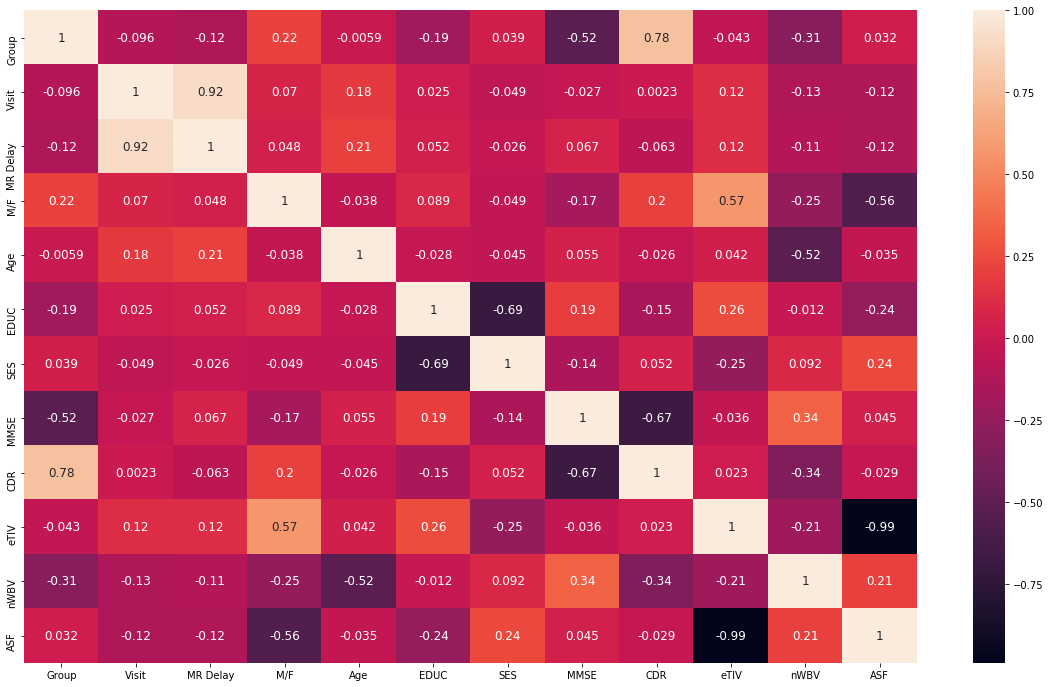

In [38]:
fig,ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":12})

MR delay is highly correlated with Visit (0.92).\
CDR is highly correlated with Group (0.78).

# Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score

In [45]:
X=df.loc[:,['M/F','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF']]
y=df['Group']

In [46]:
#Scaler the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [53]:
kfold=KFold(n_splits=5,shuffle=True)
Accuracy=[]
f1_score=[]

classifiers = ['Logistic Regression',
               'SVM',
              'Random Forest',
              'XGBoost']

models=[LogisticRegression(solver='liblinear'),SVC(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier()]

for i in models:
    model = i
    acc=cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    sco=cross_val_score(model, X, y, cv=kfold, scoring='f1_macro')
    Accuracy.append(acc.mean())
    f1_score.append(sco.mean())
    
new_model=pd.DataFrame({'Accuracy_Mean':Accuracy, 'f_score_mean' : f1_score},index=classifiers)
new_model

,Accuracy_Mean,f_score_mean
Logistic Regression,0.710703,0.701911
SVM,0.764144,0.786906
Random Forest,0.882054,0.870736
XGBoost,0.820216,0.810080
